In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping    

print("Libraries imported successfully! ✅")

Libraries imported successfully! ✅


Import Dataset (Data Preprocessing)

In [2]:
dataset_train = pd.read_csv('apple_train.csv')

Check shape of the dataset

In [3]:
dataset_train.shape

(3169, 8)

Visualize the dataset

In [4]:
dataset_train.head(100)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03 00:00:00-05:00,0.785593,0.842709,0.761716,0.838496,535796800,0.0,0.0
1,2000-01-04 00:00:00-05:00,0.810874,0.828664,0.757970,0.767802,512377600,0.0,0.0
2,2000-01-05 00:00:00-05:00,0.777165,0.828196,0.771547,0.779038,778321600,0.0,0.0
3,2000-01-06 00:00:00-05:00,0.794956,0.801510,0.711621,0.711621,767972800,0.0,0.0
4,2000-01-07 00:00:00-05:00,0.722857,0.756566,0.715367,0.745330,460734400,0.0,0.0
...,...,...,...,...,...,...,...,...
95,2000-05-18 00:00:00-04:00,0.771548,0.786061,0.753757,0.754694,373777600,0.0,0.0
96,2000-05-19 00:00:00-04:00,0.743458,0.743458,0.699449,0.704131,740667200,0.0,0.0
97,2000-05-22 00:00:00-04:00,0.702258,0.702258,0.644204,0.673699,755507200,0.0,0.0
98,2000-05-23 00:00:00-04:00,0.677913,0.699449,0.641396,0.642800,517585600,0.0,0.0


Check for `na` values in the dataset

In [5]:
dataset_train.isna().sum()    

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Check for `null` values in the dataset

In [6]:
dataset_train.isnull().sum()


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Check distribution of the dataset

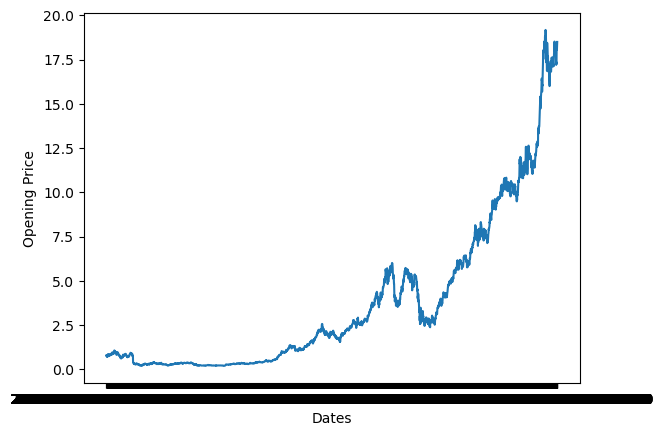

In [7]:
x = dataset_train['Date']
y = dataset_train['Open']
plt.plot(x, y)
plt.xlabel('Dates')
plt.ylabel('Opening Price')
plt.show()

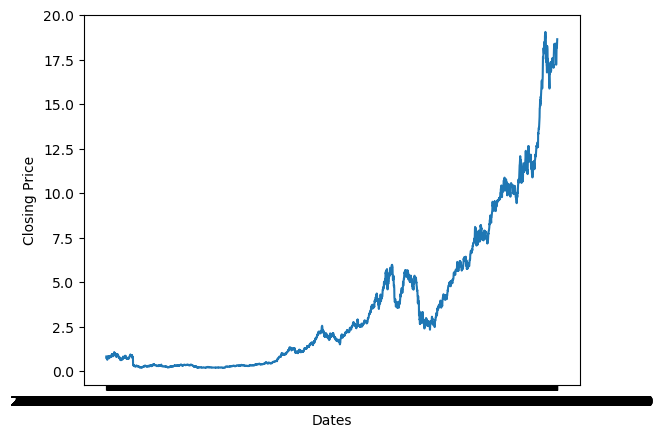

In [8]:
a = dataset_train['Date']
b = dataset_train['Close']
plt.plot(a, b)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.show()

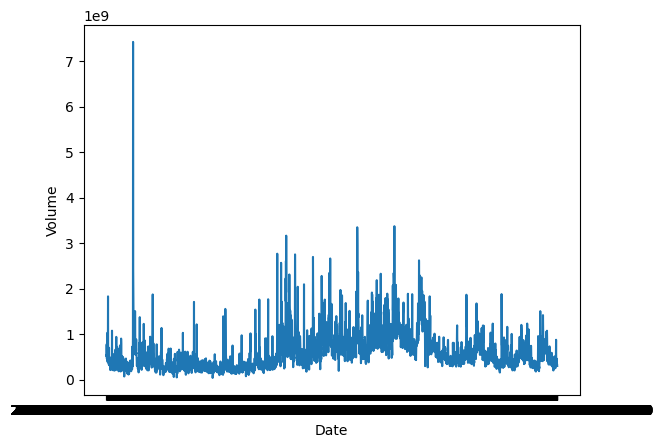

In [9]:
c = dataset_train['Volume']
d = dataset_train['Date']
plt.plot(d, c)
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


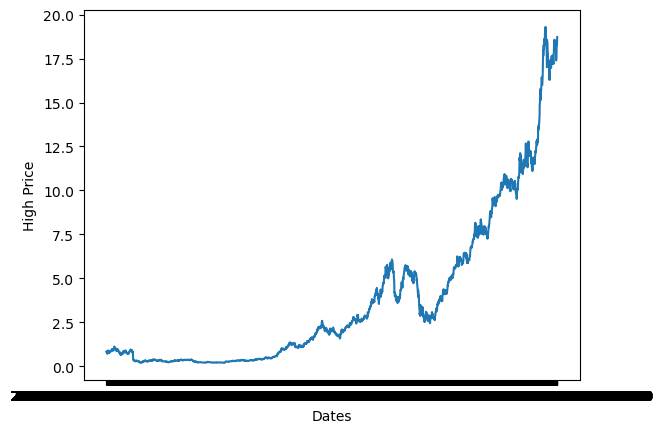

In [10]:
a = dataset_train['Date']
b = dataset_train['High']
plt.plot(a, b)
plt.xlabel('Dates')
plt.ylabel('High Price')
plt.show()


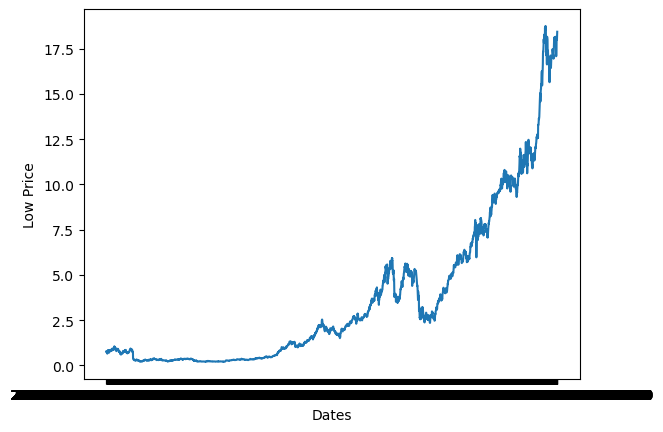

In [11]:
a = dataset_train['Date']
b = dataset_train['Low']
plt.plot(a, b)
plt.xlabel('Dates')
plt.ylabel('Low Price')
plt.show()

Creating training set

In [12]:
training_set = dataset_train.iloc[:, 1:2].values

Feature Scaling

In [13]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

x = MinMaxScaler(feature_range=(0, 1))
training_set_scaled_prices = x.fit_transform(training_set)


In [14]:
X_train = []
y_train = []
for i in range(60, 3169):
    X_train.append(training_set_scaled_prices[i-60:i, 0])
    y_train.append(training_set_scaled_prices[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping the dataset

In [15]:
X_train.shape

(3109, 60)

In [16]:
X_train

array([[0.03113778, 0.03246981, 0.03069375, ..., 0.04596267, 0.04406336,
        0.04391533],
       [0.03246981, 0.03069375, 0.03163113, ..., 0.04406336, 0.04391533,
        0.04475402],
       [0.03069375, 0.03163113, 0.02783238, ..., 0.04391533, 0.04475402,
        0.04245998],
       ...,
       [0.88893917, 0.87965661, 0.89683253, ..., 0.92262841, 0.9420623 ,
        0.96208003],
       [0.87965661, 0.89683253, 0.88170854, ..., 0.9420623 , 0.96208003,
        0.94144651],
       [0.89683253, 0.88170854, 0.87787237, ..., 0.96208003, 0.94144651,
        0.95848064]])

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train

array([[[0.03113778],
        [0.03246981],
        [0.03069375],
        ...,
        [0.04596267],
        [0.04406336],
        [0.04391533]],

       [[0.03246981],
        [0.03069375],
        [0.03163113],
        ...,
        [0.04406336],
        [0.04391533],
        [0.04475402]],

       [[0.03069375],
        [0.03163113],
        [0.02783238],
        ...,
        [0.04391533],
        [0.04475402],
        [0.04245998]],

       ...,

       [[0.88893917],
        [0.87965661],
        [0.89683253],
        ...,
        [0.92262841],
        [0.9420623 ],
        [0.96208003]],

       [[0.87965661],
        [0.89683253],
        [0.88170854],
        ...,
        [0.9420623 ],
        [0.96208003],
        [0.94144651]],

       [[0.89683253],
        [0.88170854],
        [0.87787237],
        ...,
        [0.96208003],
        [0.94144651],
        [0.95848064]]])

In [19]:
# import keras libraries and packages 

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

print("Keras libraries imported successfully! ✅")

Keras libraries imported successfully! ✅


In [20]:
# Initializing the RNN
rnn = Sequential()

# Layer 1 - Add L2 regularization to prevent overfitting
rnn.add(LSTM(
    units=50, 
    return_sequences=True, 
    input_shape=(X_train.shape[1], 1),
    kernel_regularizer=l2(0.001),  # L2 penalty on weights
    recurrent_regularizer=l2(0.001)  # L2 penalty on recurrent weights
))
rnn.add(Dropout(0.4))  # Increased dropout from 0.3 to 0.4

# Layer 2 - Add L2 regularization
rnn.add(LSTM(
    units=50, 
    return_sequences=False,
    kernel_regularizer=l2(0.001),
    recurrent_regularizer=l2(0.001)
))
rnn.add(Dropout(0.4))  # Increased dropout from 0.3 to 0.4

# Output Layer
rnn.add(Dense(units=1))

# Compile
rnn.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks - Increased patience to prevent premature stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=25,  # Increased from 15 to 25
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Multiply LR by 0.5
    patience=10,
    min_lr=0.00001,
    verbose=1
)

# Train
history = rnn.fit(
    X_train, y_train, 
    epochs=150, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],  # Added reduce_lr callback
    verbose=1
)

print("RNN trained successfully! ✅")

# Print final metrics
print(f"\nFinal Training Loss: {history.history['loss'][-1]:.6f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.6f}")
print(f"Best Validation Loss: {min(history.history['val_loss']):.6f}")
print(f"Stopped at epoch: {len(history.history['loss'])}")
print(f"Gap (Val/Train): {history.history['val_loss'][-1] / history.history['loss'][-1]:.2f}x")

Epoch 1/150


/opt/anaconda3/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0962 - val_loss: 0.0460 - learning_rate: 0.0010
Epoch 2/150
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0192 - val_loss: 0.0135 - learning_rate: 0.0010
Epoch 3/150
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 4/150
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 5/150
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 6/150
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 7/150
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 8/150
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.6902e-04 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 9/150
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.2929e-04 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 10/150
7

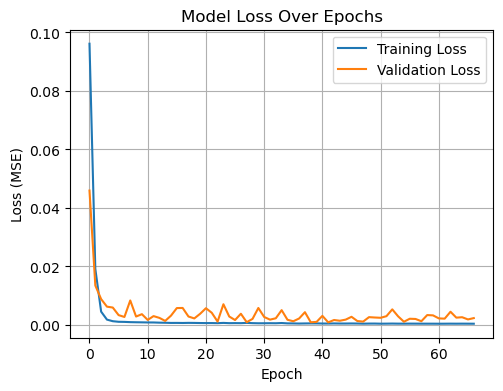

In [21]:
# Plot training & validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.show()

### Predictions

In [22]:
# load dataset
dataset_test = pd.read_csv('apple_test.csv')
test_sp = dataset_test.iloc[:,1:2].values


In [23]:
dataset_test.shape

(1359, 8)

In [24]:
# Prepare test data
# Combine training and test data to get the last 60 days context
df_combined = pd.concat([dataset_train['Open'], dataset_test['Open']], axis=0)

# Extract the portion needed for test predictions (last 60 days + test period)
df_inputs = df_combined[len(df_combined) - len(dataset_test) - 60:].values
df_inputs = df_inputs.reshape(-1, 1)

# Scale using the SAME scaler from training (important!)
df_inputs = x.transform(df_inputs)

# Create sequences for test data
X_test = []
for i in range(60, len(df_inputs)):  # Use actual length, not hard-coded
    X_test.append(df_inputs[i-60:i, 0])

X_test = np.array(X_test)

# Reshape to 3D for LSTM (samples, timesteps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"X_test shape: {X_test.shape}")
print(f"Test data prepared successfully! ✅")

X_test shape: (1359, 60, 1)
Test data prepared successfully! ✅


### Make Predictions on Test Data

In [28]:
# Make predictions
predicted_stock_price = rnn.predict(X_test)

# Inverse transform to get actual price values
predicted_stock_price = x.inverse_transform(predicted_stock_price)

print(f"Predictions shape: {predicted_stock_price.shape}")
print(f"Predictions completed! ✅")
print(predicted_stock_price)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predictions shape: (1359, 1)
Predictions completed! ✅
[[17.919033]
 [17.959503]
 [18.00297 ]
 ...
 [35.418533]
 [35.419785]
 [35.41374 ]]


### Visualize Predictions vs Actual Prices

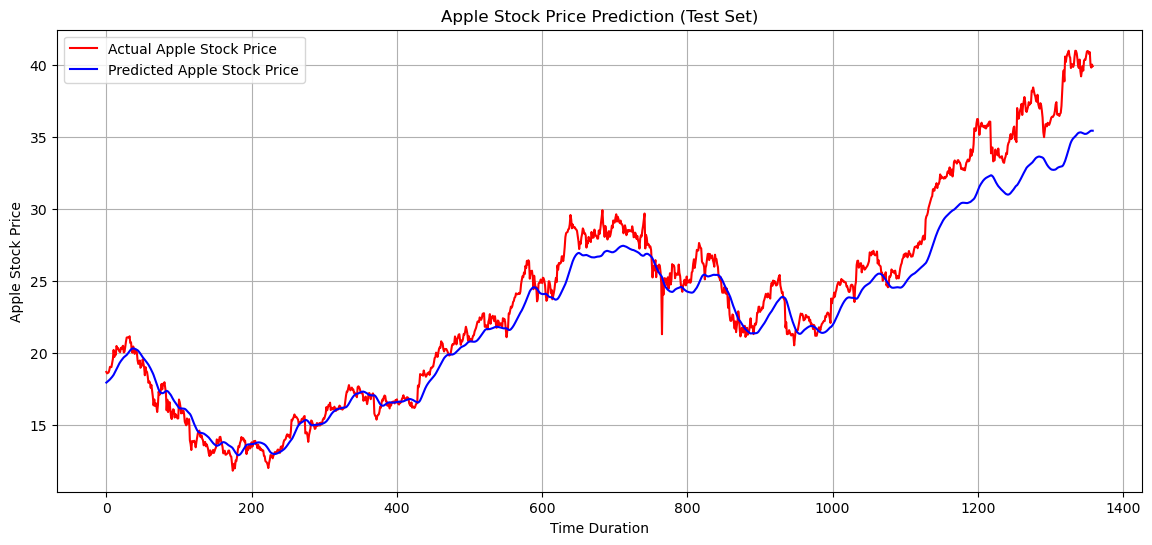

In [29]:
# Plot predictions vs actual prices
plt.figure(figsize=(14, 6))
plt.plot(test_sp, color='red', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction (Test Set)')
plt.xlabel('Time Duration')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.grid(True)
plt.show()

### Calculate Performance Metrics

In [27]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# RMSE (Root Mean Squared Error)
rmse = math.sqrt(mean_squared_error(test_sp, predicted_stock_price))

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test_sp, predicted_stock_price)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_sp - predicted_stock_price) / test_sp)) * 100

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"RMSE (Root Mean Squared Error): ${rmse:.2f}")
print(f"MAE (Mean Absolute Error):      ${mae:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")
print("=" * 50)

# Interpretation
if mape < 10:
    print("✅ Excellent prediction accuracy!")
elif mape < 20:
    print("✅ Good prediction accuracy!")
elif mape < 30:
    print("⚠️  Moderate prediction accuracy")
else:
    print("❌ Poor prediction accuracy - model needs improvement")

MODEL PERFORMANCE METRICS
RMSE (Root Mean Squared Error): $1.93
MAE (Mean Absolute Error):      $1.39
MAPE (Mean Absolute % Error):   5.22%
✅ Excellent prediction accuracy!


### Save the Trained Model

In [30]:
# Save the trained model
rnn.save('apple_stock_lstm_model.h5')
print("Model saved as 'apple_stock_lstm_model.h5' ✅")

# To load the model later:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('apple_stock_lstm_model.h5')

Model saved as 'apple_stock_lstm_model.h5' ✅
